In [19]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.optimize as sco
import datetime as dt
import math
from datetime import datetime, timedelta
from pandas_datareader import data as pdr
from sklearn.cluster import KMeans



Text(0, 0.5, 'price in $')

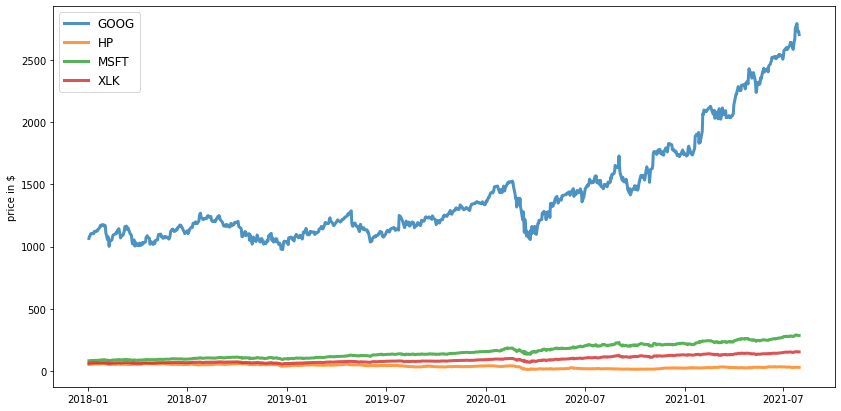

In [24]:
start = '2018-01-01'
end = '2021-07-31'

#N = 90
#start = datetime.now() - timedelta(days=N)
#end = dt.datetime.today()


tickers = ['MSFT','GOOG','HP','XLK'] 

thelen = len(tickers)

price_data = []
for ticker in tickers:
    prices = pdr.DataReader(ticker, start = start, end = end, data_source='yahoo')[['Adj Close']]
    price_data.append(prices.assign(ticker=ticker)[['ticker', 'Adj Close']])

df = pd.concat(price_data)
df.dtypes
df.head()
df.shape

pd.set_option('display.max_columns', 500)

df = df.reset_index()
df = df.set_index('Date')
table = df.pivot(columns='ticker')

# By specifying col[1] in below list comprehension
# You can select the stock names under multi-level column
table.columns = [col[1] for col in table.columns]
table.head()

plt.figure(figsize=(14, 7))
for c in table.columns.values:
    plt.plot(table.index, table[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper left', fontsize=12)
plt.ylabel('price in $')

Text(0, 0.5, 'price in $')

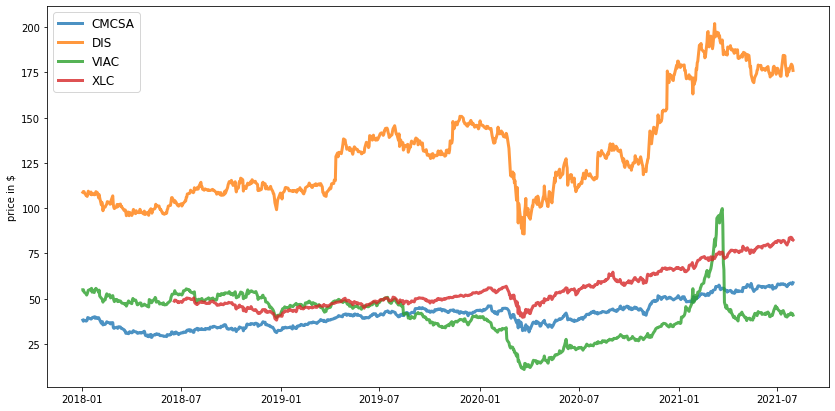

In [22]:
start = '2018-01-01'
end = '2021-07-31'

#N = 90
#start = datetime.now() - timedelta(days=N)
#end = dt.datetime.today()


tickers = ['VIAC','CMCSA','DIS','XLC'] 

thelen = len(tickers)

price_data = []
for ticker in tickers:
    prices = pdr.DataReader(ticker, start = start, end = end, data_source='yahoo')[['Adj Close']]
    price_data.append(prices.assign(ticker=ticker)[['ticker', 'Adj Close']])

df = pd.concat(price_data)
df.dtypes
df.head()
df.shape

pd.set_option('display.max_columns', 500)

df = df.reset_index()
df = df.set_index('Date')
table = df.pivot(columns='ticker')

# By specifying col[1] in below list comprehension
# You can select the stock names under multi-level column
table.columns = [col[1] for col in table.columns]
table.head()

plt.figure(figsize=(14, 7))
for c in table.columns.values:
    plt.plot(table.index, table[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper left', fontsize=12)
plt.ylabel('price in $')

In [26]:
price_data

[           ticker   Adj Close
 Date                         
 2018-01-02   MSFT   81.848289
 2018-01-03   MSFT   82.229195
 2018-01-04   MSFT   82.952927
 2018-01-05   MSFT   83.981384
 2018-01-08   MSFT   84.067101
 ...           ...         ...
 2021-07-26   MSFT  288.497681
 2021-07-27   MSFT  285.992493
 2021-07-28   MSFT  285.673096
 2021-07-29   MSFT  285.952576
 2021-07-30   MSFT  284.365601
 
 [901 rows x 2 columns],
            ticker    Adj Close
 Date                          
 2018-01-02   GOOG  1065.000000
 2018-01-03   GOOG  1082.479980
 2018-01-04   GOOG  1086.400024
 2018-01-05   GOOG  1102.229980
 2018-01-08   GOOG  1106.939941
 ...           ...          ...
 2021-07-26   GOOG  2792.889893
 2021-07-27   GOOG  2735.929932
 2021-07-28   GOOG  2727.629883
 2021-07-29   GOOG  2730.810059
 2021-07-30   GOOG  2704.419922
 
 [901 rows x 2 columns],
            ticker  Adj Close
 Date                        
 2018-01-02     HP  52.580147
 2018-01-03     HP  52.821529
 2018-0